# The Hypothesis

`“Since the UK was one of the main countries that colonised the USA, and the UK is on the east side of the USA there are more towns/cities with UK names on the east coast of the US rather than the west coast”`

## Data

https://github.com/apache/commons-csv/raw/master/src/test/resources/perf/worldcitiespop.txt.gz

lets get the imports out of the way

In [1]:
import pandas as pd

In [2]:
dataset = "/home/stormfield/scratch/DLG/worldcitiespop.txt"

In [3]:
dataset_df = pd.read_csv(dataset,encoding = "ISO-8859-1", low_memory=False)

the file wasn't UTF-8 encoded. The is 'ISO-8859-1' encoded (LATIN-1)

(I was about seek clarification regarding th encoding, but on closer examination of the actual use of the dataset in the apache commons, bench marking test class in github, it seems the file was infact 'ISO-8859-1'. Please refer [this](https://github.com/apache/commons-csv/blob/master/src/test/java/org/apache/commons/csv/CSVBenchmark.java) java file at line numbers 64 & 66)

## Data Exploration

Lets see what the data looks like

In [4]:
dataset_df.head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
0,ad,aixas,Aixàs,06,NaN,42.483333,1.466667
1,ad,aixirivali,Aixirivali,06,NaN,42.466667,1.500000
2,ad,aixirivall,Aixirivall,06,NaN,42.466667,1.500000
3,ad,aixirvall,Aixirvall,06,NaN,42.466667,1.500000
4,ad,aixovall,Aixovall,06,NaN,42.466667,1.483333


Lets verify the assumption of country names ie GB for United Kingdom & US for United States of America. [source](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes)

In [5]:
# united kingdom
'gb' in dataset_df['Country'].unique()

True

In [6]:
# USA
'us' in dataset_df['Country'].unique()

True

lets see what each of the data looks like

In [7]:
#uk_cities  
dataset_df.loc[dataset_df['Country'] == 'gb' ].head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
826690,gb,abberley,Abberley,Q4,NaN,52.300000,-2.366667
826691,gb,abberton,Abberton,F2,NaN,51.833333,0.916667
826692,gb,abberton,Abberton,F7,NaN,52.183333,-2.016667
826693,gb,abbess roding,Abbess Roding,E4,NaN,51.783333,0.266667
826694,gb,abbey-cwmhir,Abbey-Cwmhir,Y8,NaN,52.333333,-3.400000


In [8]:
#us_cities
dataset_df.loc[dataset_df['Country'] == 'us' ].head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2532482,us,abanda,Abanda,AL,NaN,33.100833,-85.529722
2532483,us,abbeville,Abbeville,AL,NaN,31.571667,-85.250556
2532484,us,abbot springs,Abbot Springs,AL,NaN,33.360833,-86.481667
2532485,us,abel,Abel,AL,NaN,33.548611,-85.712500
2532486,us,abercrombie,Abercrombie,AL,NaN,32.848611,-87.165000


Lets create two seperate data frames to store details for UK & US

In [9]:
us = dataset_df.loc[dataset_df['Country'] == 'us' ].copy()

In [10]:
uk=  dataset_df.loc[dataset_df['Country'] == 'gb' ].copy()

In [11]:
us.duplicated('City').sum()

56025

In [12]:
uk.duplicated('City').sum()

1437

In [13]:
us.loc[us['City'] == 'london' ].head()

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2534705,us,london,London,AL,NaN,31.297500,-87.087778
2541129,us,london,London,AR,NaN,35.328889,-93.252778
2545390,us,london,London,CA,NaN,36.476111,-119.442222
2567874,us,london,London,IN,NaN,39.625556,-85.920278
2575484,us,london,London,KY,NaN,37.128889,-84.083333


Since the current task is see if the UK cities are there in US we need to only consider distinct cities in UK. 

But for US we need to consider all the cities since the same city name could be in more than one region. For example the UK city `London` is there in more than one region in the USA.
Hence they are valid for our analysis.

So for the UK data we will consider distinct city names, hence we drop the duplicates

In [14]:
 uk.drop_duplicates(subset='City',inplace=True)

**Thoughts before further Analysis**

The map of USA with state names looks like the following:

![Image of USA with State names](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a5/Map_of_USA_with_state_names.svg/1000px-Map_of_USA_with_state_names.svg.png)

To proceed further we need to define which cities fall under east coast or west cost. One way is to use the the latitude longitude data for each city, but that would involve more analysis and data crunching to figure out in coast each city lies. But if we go down that route we might need to consider the non-standard shape of the country as well which would make the analysis harder.

A easier approach is to use the a more widely recognized definition from wikipedia in which:
- East coast of USA implies the coastal states that have shoreline on the Atlantic Oceaan 
- West coast of USA implies the coastal states that have shoreline on the Pasafic Oceaan 

**Notes**

 - **Alaska & Hawaii** was never colonized by the British. so I will not be considering them in the current analysis. The rationale is given [here](#another_cell) with data to support it. Please note that this is a debatable topic
 - **Fun Fact** : Alaska was [pruchased](https://en.wikipedia.org/wiki/Alaska_Purchase) from Russia by the the then 'United states'. Russia  didn't want to sell it to UK so that UK doesn't get a stronghold there. But both UK & US was approached in hopes of a bidding war. But the then British Prime Minister Lord Palmerston steadfastly rejected the offer, arguing that Canada had enough uncharted wilderness to deal with and that Britain would overstretch its resources in maintaining Alaska. Hence Alaska was purchased by the US for a today equivalent of a little over 100 million dollors
 
 - **Pennsylvania**  
 While Pennsylvania is not directly along the Atlantic shoreline, it borders the tidal portion of the Delaware River, and the city of Philadelphia was a major seaport. Hence we will consider it in our analysis [Read more here](https://en.wikipedia.org/wiki/East_Coast_of_the_United_States#cite_ref-3)
 
 - **Fun Fact** : The original [thirteen colonies](https://en.wikipedia.org/wiki/Thirteen_Colonies) of Great Britain in North America all lay along the East Coast. [see citation](https://en.wikipedia.org/wiki/East_Coast_of_the_United_States#cite_ref-3)


**Fun fact**: According to the infograph from this [article](https://en.wikipedia.org/wiki/European_colonization_of_the_Americas#English_and_(after_1707)_British) we can see that UK never colonized the lower part ie South western US. Check the cool GIF below which indicates the same

<img src=https://upload.wikimedia.org/wikipedia/commons/4/40/Non-Native-American-Nations-Territorial-Claims-over-NAFTA-countries-1750-2008.gif width="500">

 **West cost states** are : California, Oregon, Washington, and Alaska. [reference](https://en.wikipedia.org/wiki/West_Coast_of_the_United_States)

 **East coast** states are :  Maine, New Hampshire, Massachusetts, Rhode Island, Connecticut, New York, New Jersey, Delaware, Maryland, Virginia, North Carolina, South Carolina, Georgia, and Florida. [reference](https://en.wikipedia.org/wiki/East_Coast_of_the_United_States#cite_note-East_Coast_States-1)

In [15]:
us['Region'].unique()

array(['AL', 'AK', 'AS', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL',
       'GA', 'GU', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME',
       'MH', 'MD', 'MA', 'MI', 'FM', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV',
       'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'MP', 'OH', 'OK', 'OR', 'PW',
       'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VI', 'VA',
       'WA', 'WV', 'WI', 'WY'], dtype=object)

so the abbreviations in [ANSI](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations) 2 letter format

lets make lists for easy handling

In [17]:
west_coast_state_list = ['CA','WA','OR'] #'AK','HI'] # Yes ignoring Alaska & Hawaii 
                                         # was on purpose see notes below
east_coast_state_list = ['ME', 'NH', 'MA', 'RI', 'CT', 'NY', 'PA', 'NJ',
                        'DE', 'MD', 'VA', 'NC','SC', 'GA', 'FL']

In [18]:
us_west_coast_df = us[us['Region'].isin(west_coast_state_list)].copy()
us_east_coast_df = us[us['Region'].isin(east_coast_state_list)].copy()

lets see what the data looks like

I am going to use [Sample function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) to view random samples in our dataframe

In [19]:
us_west_coast_df.sample(2)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2546303,us,paularino,Paularino,CA,NaN,33.681389,-117.877778
2546956,us,santa ynez,Santa Ynez,CA,NaN,34.614444,-120.078889


In [20]:
us_east_coast_df.sample(2)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2613934,us,greenfield park,Greenfield Park,NY,NaN,41.725833,-74.486111
2617935,us,bear poplar,Bear Poplar,NC,NaN,35.675833,-80.693611


Nothing out of the ordinary till now.
But for our analysis only the cities names are enough.
So lets take the city names alone into a new dataframe

In [21]:
us_west_coast_cities = us_west_coast_df.filter(['City'],axis=1)

In [22]:
us_east_coast_cities = us_east_coast_df.filter(['City'],axis=1)

In [65]:
english_city_names = uk['City'].tolist()
len(english_city_names)

15446

lets get a list of US cities in East & West coast that have english names

lets find out all the US coastal cities with English names

In [81]:
us_west_coast_english_name_cities = us_west_coast_df[us_west_coast_df['City'].isin(english_city_names)].copy()

In [83]:
us_east_coast_english_name_cities = us_east_coast_df[us_east_coast_df['City'].isin(english_city_names)].copy()

Lets combine them to a single dataframe

In [91]:
us_costal_cities_english_names = us_west_coast_english_name_cities.append(us_east_coast_english_name_cities, ignore_index=True)

we can use this data frame later for visualization

In [96]:
us_costal_cities_english_names.sample(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2963,us,selkirk,Selkirk,PA,NaN,41.687222,-79.580556
46,us,coniston,Coniston,CA,NaN,38.415000,-121.559167
2473,us,middletown,Middletown,NC,NaN,35.478056,-76.012500
1806,us,martin,Martin,NH,NaN,43.043333,-71.454722
3440,us,grays,Grays,VA,NaN,36.800000,-82.502500


Now since we have the relevant US cities, we can easily update their counts in our UK dataframe

In [23]:
uk['east_coast_name_count'] = uk['City'].map(us_east_coast_cities['City'].value_counts())
uk['west_coast_name_count'] = uk['City'].map(us_west_coast_cities['City'].value_counts())

In [24]:
uk.sample(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude,east_coast_name_count,west_coast_name_count
833765,gb,helhoughton,Helhoughton,I9,NaN,52.800000,0.766667,NaN,NaN
837270,gb,moneyneany,Moneyneany,S6,NaN,54.816667,-6.833333,NaN,NaN
833401,gb,hallaton,Hallaton,L4,NaN,52.550000,-0.833333,NaN,NaN
834291,gb,hull,Hull,G6,NaN,53.716667,-0.333333,3.0,NaN
834577,gb,itteringham,Itteringham,I9,NaN,52.833333,1.183333,NaN,NaN


so as expected there are few UK city names which aren't present in US lets fill those with 0 instead of `NaN`

In [25]:
uk.fillna({'east_coast_name_count':0, 'west_coast_name_count':0},inplace=True)

In [29]:
uk.sample(5)

,Country,City,AccentCity,Region,Population,Latitude,Longitude,east_coast_name_count,west_coast_name_count
836506,gb,lower soudley,Lower Soudley,E6,NaN,51.783333,-2.483333,0.0,0.0
831337,gb,drayton,Drayton,D6,NaN,51.650000,-1.133333,2.0,0.0
832247,gb,feorlean,Feorlean,T8,NaN,55.966667,-5.183333,0.0,0.0
842654,gb,westerfield,Westerfield,N5,NaN,52.083333,1.166667,0.0,0.0
838014,gb,norwood,Norwood,G5,NaN,51.400000,-0.083333,10.0,2.0


In [31]:
#uk.loc[uk['City']=='thompson']#.sample(5)
uk.loc[uk['City'].isin(['drayton','norwood','westerfield'])]

,Country,City,AccentCity,Region,Population,Latitude,Longitude,east_coast_name_count,west_coast_name_count
831337,gb,drayton,Drayton,D6,NaN,51.650000,-1.133333,2.0,0.0
838014,gb,norwood,Norwood,G5,NaN,51.400000,-0.083333,10.0,2.0
842654,gb,westerfield,Westerfield,N5,NaN,52.083333,1.166667,0.0,0.0


Sanity check - see if the these cities have corresponding count in the orginal list.

ie in the East coast dataframe should have these many occurences:

`
drayton      =  2
norwood      = 10 
westerfield  = 0`

In [34]:
us_east_coast_cities[us_east_coast_cities['City'].isin(['drayton','norwood','westerfield'])]

,City
2554217,norwood
2556795,drayton
2558784,norwood
2587029,norwood
2591042,norwood
2609520,norwood
2615545,norwood
2620506,norwood
2636593,norwood
2640936,norwood


Phew so we are on the right track!!

### Analysis of the Data

Before we dig further lets try to visualize the data using [scatter plot](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#scatter-plot) 

In [49]:
import matplotlib.pyplot as plt

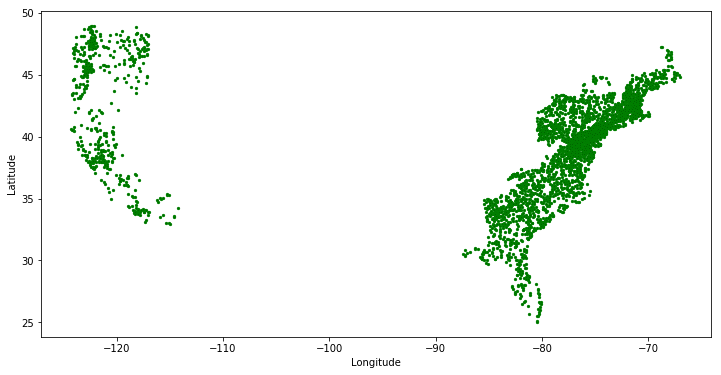

In [145]:
us_costal_cities_english_names.plot(kind='scatter',
                                          x='Longitude',
                                          y='Latitude',
                                          c='DarkGreen',
                                          figsize=(12,6),
                                          marker=".",
                                          edgecolors='green')

**Inferences**

Since the plot was created with US costal cities that have english names, we can derive few inferences from it.

- There are certainly more cities in the East coast with Enhlish names than in the West coast
- The density of the plotted points in the East coast is more than the West. Which means such cities are more closer together in the East.
- In the East coast we can easily see lots of English cities plotted along  the shore line itself. This trend is lesser in the west coast.

All this further strengthens the proposed hypothesis

Lets see how much percentage the US coastal cities with English/UK names actually are there

3113.0
526.0
55327
9115

In [183]:
total_num_east_coast_us_cities = us_east_coast_cities['City'].value_counts().sum()
total_num_west_coast_us_cities = us_west_coast_cities['City'].value_counts().sum()

east_coast_english_name_cities = uk['east_coast_name_count'].sum()
west_coast_english_name_cities = uk['west_coast_name_count'].sum()

percentage_east_coast_english_names = (east_coast_english_name_cities/total_num_east_coast_us_cities) * 100
percentage_west_coast_english_names = (west_coast_english_name_cities/total_num_west_coast_us_cities) * 100

print("Number of US East coast cities with English names " + str(east_coast_english_name_cities))
print("Number of US West coast cities with English names " + str(west_coast_english_name_cities))

print()
print("Totat number of US East coast cities = "+ str(total_num_east_coast_us_cities))
print("Totat number of US West coast cities = "+ str(total_num_west_coast_us_cities))
print()
print("Percentage of US East coast cities with English Names = " + str(round(percentage_east_coast_english_names,2)))
print("Percentage of US West coast cities with English Names = " + str(round(percentage_west_coast_english_names,2)))

Number of US East coast cities with English names 3113.0
Number of US West coast cities with English names 526.0

Totat number of US East coast cities = 55327
Totat number of US West coast cities = 9115

Percentage of US East coast cities with English Names = 5.63
Percentage of US West coast cities with English Names = 5.77


- West coast lead by a difference is 0.14%
- But east cost still has more number of cities with English/UK names
- This makes sense since the 13 colonies was always along the East coast and west coast was midwest were mostly conquered by other nations

## Conlusion

* We can see that when we calculated the percentage of the cities with english names in USA the West coast leads by marginal difference

* Peronally I wouldn't bank on the difference since we haven't considered all the factors, like influence of other countries or similar sounding names.  So we need more thorugh tests to actually figure out if the difference is valid


* So the hypothesis still stands since we have more number of cities with English names in East coast than the West



<a id='another_cell'></a>
**Thoughts on including Hawaii & Alaska**

Case in point [Wales, AK, USA](https://en.wikipedia.org/wiki/Wales,_Alaska). Even though this Wales was never colonized by the UK, its name is derived from the Wales in UK. This happend around 1890s. OK so there could be names in cities in Hawaii or Alaska that could have some very distant relation to the English names

While I drilled through the below data I found that there were only 23 such english names. Everything were from Alaska. Regardless this wouldn't statiscally change the result by a huge factor (Yes I checked it), since total number of cities for AK & HI = 1145. Since they are in the West coast it affected only the perncentage in the West coast alone, specifically It lowered it to `5.13%`. That brings the difference in percentages to 0.64%

Regardless it wasn't enough to refute the hypothesis. I know its debatable, but in reality we need to consider more things rather than direct name based equality comparisons right?

In [45]:
us_west_coast_AK_HI = us[us['Region'].isin(['AK','HI'])].copy()
us_west_coast_AK_HI_cities = us_west_coast_AK_HI.filter(['City'],axis=1)
uk_temp = dataset_df.loc[dataset_df['Country'] == 'gb' ].copy()
us_temp = dataset_df.loc[dataset_df['Country'] == 'us' ].copy()
uk_temp['west_coast_name_count'] = uk_temp['City'].map(us_west_coast_AK_HI_cities['City']\
                                                       .value_counts())\
                                                       .fillna(0)
test = us_temp[us_temp['Region'].isin(['AK','HI'])].copy()


Yes who knew Wales was also there in the USA

In [46]:
test.loc[test['City'] =='wales' ]

,Country,City,AccentCity,Region,Population,Latitude,Longitude
2537388,us,wales,Wales,AK,NaN,65.609167,-168.0875


In [47]:
uk_temp.loc[( uk_temp['City'] =='wales') ]

,Country,City,AccentCity,Region,Population,Latitude,Longitude,west_coast_name_count
842273,gb,wales,Wales,C9,NaN,53.333333,-1.283333,1.0


In [48]:
uk_temp.loc[( uk_temp['west_coast_name_count'] > 0) ].shape

(39, 8)